In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import datasets
from scipy.special import expit


uploaded = files.upload()
dataset = pd.read_csv('USD_IDR Historical Data 5 year.csv')  
dataset.shape 


(1355, 6)

In [0]:
print(dataset.head() )

price = dataset.iloc[:, 1].str.replace(',', '').astype(float)
date = dataset.iloc[:, 0].values


           Date     Price      Open      High       Low Change %
0  Nov 30, 2018  14,281.2  14,361.0  14,383.0  14,250.5   -0.56%
1  Nov 29, 2018  14,361.0  14,459.8  14,528.0  14,311.5   -1.15%
2  Nov 28, 2018  14,527.5  14,513.5  14,542.5  14,509.5    0.10%
3  Nov 27, 2018  14,513.5  14,488.5  14,518.5  14,478.5    0.27%
4  Nov 26, 2018  14,475.0  14,540.0  14,565.0  14,455.0   -0.45%


In [0]:
arb_norm = 20000
data = price
data = np.array(data)/arb_norm

In [0]:
class neuralNetwork(object):
    def __init__(self, window):
        self.inputLayerS= window
        self.outputLayerS=1
        self.hiddenLayer1S=500
        self.hiddenLayer2S=500
        
        np.random.seed(1)
        
        self.w1 = np.random.randn(self.inputLayerS, self.hiddenLayer1S)
        self.w2 = np.random.randn(self.hiddenLayer1S, self.hiddenLayer2S)
        self.w3 = np.random.randn(self.hiddenLayer2S, self.outputLayerS)
        self.B1 = np.random.randn(self.hiddenLayer1S)
        self.B2 = np.random.randn(self.hiddenLayer2S)
        
        self.B1 = np.random.randn(self.hiddenLayer1S)
        self.B2 = np.random.randn(self.hiddenLayer2S)
    
    def forward(self, x):
        self.z0 = x
        self.f0 = x#self.sigmoid(self.z0)
        self.z1 = np.dot(self.f0, self.w1)
        self.f1 = self.sigmoid(self.z1 + self.B1)
        self.z2 = np.dot(self.f1, self.w2)
        self.f2 = self.sigmoid(self.z2 + self.B2)
        self.z3 = np.dot(self.f2, self.w3)
        self.f3 = self.sigmoid(self.z3)
        return self.f3
    
    def sigmoid(self, z):
        return expit(z)
    
    def sigmoidP(self, x):
        #x = self.sigmoid(x)
        return x * (1.0 - x)
    
    def costFunc(self, res, tar):
        #tar = target the digit value
        #res = result of the forward NN
        yHat = self.forward(res)
        return np.sum((tar-yHat)**2)

    def costFuncPrime(self, exp, z, res):
        #z = image of digit in a single array / input
        
        lr = 1
        
        y = (exp - res)*2
        delta3 = y*self.sigmoidP(self.f3)
        dcdw3 = np.dot(self.f2.T,delta3)
        
        
        delta2 = np.dot(delta3,self.w3.T) * self.sigmoidP(self.f2)
        dcdw2 = np.dot(self.f1.T,delta2)
        
        delta1 = np.dot(delta2,self.w2.T) * self.sigmoidP(self.f1)
        dcdw1 = np.dot(self.f0.T,delta1)
        
        dw3 = (dcdw3)
        dw2 = (dcdw2)
        dw1 = (dcdw1)
        
        #db1 = np.sum(self.dcdb1, axis=0)
        #db2 = np.sum(self.dcdb2, axis=0)
        return dw3, dw2, dw1#, db1, db2
    
    def trainBias(self, z, exp, lr):
        res=self.forward(z)
        #z = image of digit in a single array
        
        lr = 1
        
        y = (exp - res)*2
        delta3 = y*self.sigmoidP(self.f3)       
        
        delta2 = np.dot(delta3,self.w3.T) * self.sigmoidP(self.f2)
        
        delta1 = np.dot(delta2,self.w2.T) * self.sigmoidP(self.f1)
        
        self.B2 += np.sum(delta2, axis=0) * lr
        self.B1 += np.sum(delta1, axis=0) * lr
        
        return
    
    def trainNN(self, image, target):
        res=self.forward(image)
        dw3, dw2, dw1= self.costFuncPrime(target, image, res)
        return dw3, dw2, dw1
                
    def testNN(self, image, tar):
        res = self.forward(image)
        y = tar
        return res, self.costFunc(image, y)

In [0]:
WINDOW = 10
rec = neuralNetwork(WINDOW)
setSize = 10 #Batch Size
learnRate = 0.001
periods = 10 #Epoch
iterations = 10 #Steps

In [0]:
sep = int(len(data)*0.8)

train = data[:sep]
test = data[sep:]

input_x = []
output_y = []

for i in range(len(train)-WINDOW-1):
  features = []
  labels = []
  for j in range(WINDOW):
    features.append(train[i+j])
  labels.append(train[i+WINDOW])
  input_x.append(features)
  output_y.append(labels)
  
permutation = np.random.permutation(len(input_x))

input_x = np.array(input_x)
output_y = np.array(output_y)

input_x = input_x[permutation]
output_y = output_y[permutation]

test_input_x = []
test_output_y = []

for i in range(len(test)-WINDOW-1):
  features = []
  labels = []
  for j in range(WINDOW):
    features.append(train[i+j])
  labels.append(train[i+WINDOW])
  test_input_x.append(features)
  test_output_y.append(labels)


#digits.data = np.array(digits.data, 'float32') 
#digits.target = np.array(digits.target, 'int16')
#
##digits.data = digits.data.reshape((len(features),28, 28))
#minVal = np.amin(digits.data)
#
#digits.data = (digits.data - np.amin(digits.data))/(np.amax(digits.data) - minVal)
#
#permutation = np.random.permutation(len(digits.data))
#
#digits.data = digits.data[permutation]
#digits.target = digits.target[permutation]

In [0]:
#Trains Both

for period in range(periods):
    for iteration in range(iterations):
        for i in range(int((len(input_x)/setSize)-1)):
            dw3, dw2, dw1= rec.trainNN(input_x[i*setSize:(i+1)*setSize], output_y[i*setSize:(i+1)*setSize])
            rec.w1 = rec.w1 + dw1*learnRate
            rec.w2 = rec.w2 + dw2*learnRate
            rec.w3 = rec.w3 + dw3*learnRate

            #rec.B1 = rec.B1 + db1*learnRate
            #rec.B2 = rec.B2 + db2*learnRate
    for iteration in range(int((len(input_x)/setSize)-1)):
        for i in range(int((len(input_x)/setSize)-1)):
            rec.trainBias(input_x[i*setSize:(i+1)*setSize], output_y[i*setSize:(i+1)*setSize], learnRate)
    
    print(period)
    
print("Done")

0
1
2
3
4
5
6
7
8
9
Done


In [0]:
#import matplotlib.pyplot as plt

TotalCost = 0
countLoop = 0
maxCost = 0

for i in range(len(test_input_x)):
    countLoop += 1
    res, cost = rec.testNN(test_input_x[i], test_output_y[i])
    TotalCost += cost
    if maxCost < cost:
        maxCost = cost

print("\nAverage Cost")
print((TotalCost/countLoop))
print("\nMax Cost")
print(maxCost)


Average Cost
0.08401840835060748

Max Cost
0.11261057988710867


260
260
260


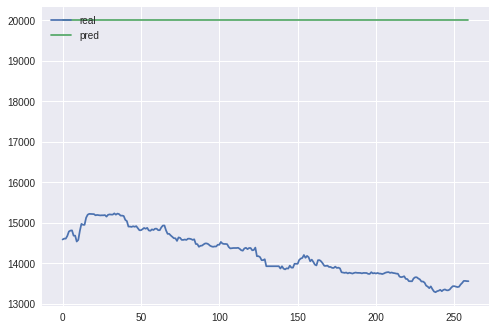

In [0]:
import matplotlib.pyplot as plt

def converter(x):
  out = []
  for i in x:
    out.append(i[0] * arb_norm)
  return out

def converter1(x):
  out = []
  for i in x:
    out.append(i * arb_norm)
  return out

res = rec.forward(test_input_x)

#cret = test_input_x[0].copy()
#temp = test_input_x[0].copy()
#
#out = []
#
#for i in range(89):
#  cret1 = rec.forward(temp)
#  cret.append(cret1[0])
#  temp = cret[i+1:] 
#

  
index = np.arange(len(res))

#test = converter1(cret)
real = converter(test_output_y)
pred = converter(res)

print(len(res))
print(len(real))
print(len(pred))

plt.plot(index, real)
plt.plot(index, pred)
#plt.plot(index, test)

plt.legend(['real', 'pred'], loc='upper left')

plt.show()
